In [1]:
# execute this cell before you start the lecture

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing(use_latex="mathjax")
x, y, z, t = sym.symbols('x y z t')
from ipywidgets import interact

# Interpolation

If you are given the values $f(x_1),f(x_2),\ldots$ of a function at certain points $x_1, x_2, \ldots$ only, and you would like to have an approximation $f(x)$ of this function somewhere in between those points. In the simplest case, you just linearly interpolate between points, for example through 
\begin{equation}
 f(x) \approx f(x_1) \frac{x-x_2}{x_1-x_2} + f(x_2) \frac{x-x_1}{x_2-x_1}
\end{equation}

For example in python we can write a function:


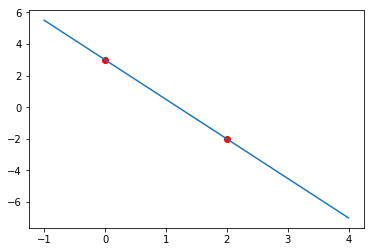

In [2]:
def linear_approx(x,xf1,xf2):
    (x1,f1) = xf1
    (x2,f2) = xf2
    return f1*(x-x2)/(x1-x2) + f2*(x-x1)/(x2-x1)

# example:
x1, f1 = 0.0, 3.0
x2, f2 = 2.0, -2.0

plt.plot(x1,f1,"ro")
plt.plot(x2,f2,"ro")

myx = np.linspace(-1,4,200)
plt.plot(myx,linear_approx(myx,(x1,f1),(x2,f2)))

Let us now generalize this to the quadratic case. Here we have 

\begin{equation}
 f(x) \approx f(x_1) \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)} +f(x_2) \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)} + f(x_3) \frac{(x-x_2)(x-x_1)}{(x_3-x_2)(x_3-x_1)} 
\end{equation}

Try to understand, why this gives an approximation in the form of quadratic polynomial.

In python the code looks as follows:

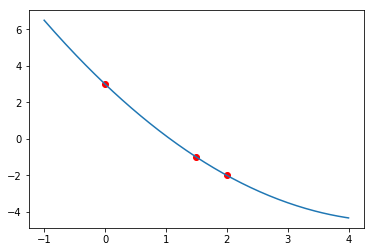

In [3]:
def quadratic_approx(x,xf1,xf2,xf3):
    (x1,f1) = xf1
    (x2,f2) = xf2
    (x3,f3) = xf3
    return (
        f1*(x-x2)*(x-x3)/((x1-x2)*(x1-x3)) +
        f2*(x-x1)*(x-x3)/((x2-x1)*(x2-x3)) +
        f3*(x-x1)*(x-x2)/((x3-x1)*(x3-x2)) )

# example:
x1, f1 = 0.0, 3.0
x2, f2 = 2.0, -2.0
x3, f3 = 1.5, -1.0

plt.plot(x1,f1,"ro")
plt.plot(x2,f2,"ro")
plt.plot(x3,f3,"ro")

myx = np.linspace(-1,4,200)
plt.plot(myx,quadratic_approx(myx,(x1,f1),(x2,f2),(x3,f3)))

Let us also make this interactive, so that we can play around with it:

In [3]:
def quadratic_approx(x,xf1,xf2,xf3):
    (x1,f1) = xf1
    (x2,f2) = xf2
    (x3,f3) = xf3
    return (
        f1*(x-x2)*(x-x3)/((x1-x2)*(x1-x3)) +
        f2*(x-x1)*(x-x3)/((x2-x1)*(x2-x3)) +
        f3*(x-x1)*(x-x2)/((x3-x1)*(x3-x2)) )

# example:
@interact(x1=(0.0,3.0),x2=(0.0,3.0),x3=(0.0,3.0),f1=(-3.0,3.0),f2=(-3.0,3.0),f3=(-3.0,3.0))
def myplot(x1 =0.0, f1 =  3.0, x2 = 2.0, f2 = -2.0, x3 = 1.5, f3 = -1.0):
    plt.plot(x1,f1,"ro")
    plt.annotate("$x_1$", xy=(x1,f1))
    plt.plot(x2,f2,"ro")
    plt.annotate("$x_2$", xy=(x2,f2))
    plt.plot(x3,f3,"ro")
    plt.annotate("$x_3$", xy=(x3,f3))
    myx = np.linspace(-1,4,200)
    plt.xlim((-1,4))
    plt.ylim((-3,3))
    plt.plot(myx,quadratic_approx(myx,(x1,f1),(x2,f2),(x3,f3)))
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='x1', max=3.0), FloatSlider(value=3.0, description='f…

Similar schemes also exist for cubic and higher polynomials, but in practice it makes more sense to approximate functions with low-order polynomials at individual intervals. 

## Numerical Integration in 1D

Integration is one of the basic skills in calculus, and we have seen that we can use `sym.integrate()` to integrate many classical functions analytically.  Why do we therefore need to bother with *numerical integration*?  Well, the problem with symbolic integration is that it is rarely working at all, because many even simple functions can not be integrated in a closed form. Try for example to integrate 
\begin{equation}
\int_0^{2\pi}\sqrt{x+1}e^{\sin(x)}dx
\end{equation}

In [3]:
expr = sym.sqrt(x+1)*sym.exp(sym.sin(x))
expr_integral = sym.Integral(expr,(x,0,2*sym.pi))
expr_integral.doit()

2⋅π                     
 ⌠                      
 ⎮    _______  sin(x)   
 ⎮  ╲╱ x + 1 ⋅ℯ       dx
 ⌡                      
 0                      

You may have noticed that python tried for quite some time to perform the intergation, trying out  a number of tricks internally. However it eventually gave up and simply returned the integral itself. Why should it not be possible to evaluate this integral? After all the function looks perfectly smooth:

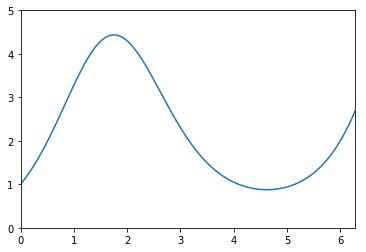

In [4]:
expr_np = sym.lambdify(x, expr, "numpy")

l, r = 0, 2*np.pi

myx = np.linspace(l, r, 200)

plt.ylim((0, 5))
plt.xlim((l, r))
plt.plot(myx,expr_np(myx))

Of course, it is possible to find this integral, however there is no closed analytical expression for it.  We need to ask for a *numerical* evaluation:

In [5]:
integral_exact = expr_integral.evalf()
integral_exact

13.9863795712146

What happens when we do this operation? Let us try to reproduce this results at least approximately *by hand*.  Let us divide the interval $[0,2\pi]$ into 5 subintervals with  boundaries $x_0=0,x_1,x_2,\ldots,x_5=2\pi$

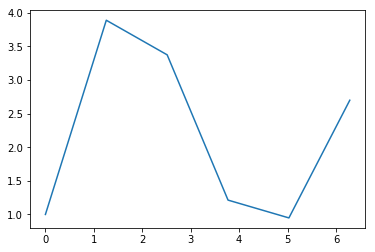

In [8]:
plt.plot(xN, fN)

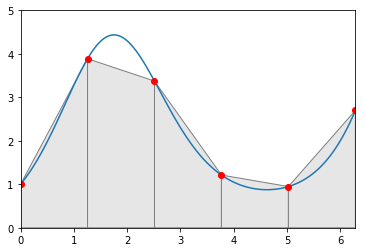

In [7]:
from matplotlib.patches import Polygon

expr_np = sym.lambdify(x, expr, "numpy")

l, r = 0.0, 2*np.pi
N = 5

myx = np.linspace(l,r,200)

xN = np.linspace(l,r,N+1)
fN = expr_np(xN)

fig, ax = plt.subplots()
plt.plot(myx,expr_np(myx))
plt.plot(xN, fN,"ro")
plt.ylim((0,5))
plt.xlim((l,r))

for li,ri in zip(xN[:-1],xN[1:]):
    ax.add_patch(Polygon([(li,0), (ri,0), (ri, expr_np(ri)), (li, expr_np(li))],
                         facecolor='0.9', edgecolor='0.5'))

In this way, we have now approximated the original function using the linear interpolation from the last section. If we are to calculate the area below the blue curve, we can approximate it as a sum of integrals over the linear functions in each interval, which is much easier to calculate. 

In [9]:
x, x1, x2, f1, f2 = sym.symbols('x x1 x2 f1 f2')
f_lin = f1*(x-x2)/(x1-x2) + f2*(x-x1)/(x2-x1)
integral_lin = sym.Integral(f_lin,(x,x1, x2))
                            
sym.Eq(integral_lin,sym.factor(sym.simplify(integral_lin.doit())))

x₂                                                       
⌠                                                        
⎮  ⎛f₁⋅(x - x₂)   f₂⋅(x - x₁)⎞      -(f₁ + f₂)⋅(x₁ - x₂) 
⎮  ⎜─────────── + ───────────⎟ dx = ─────────────────────
⎮  ⎝  x₁ - x₂       -x₁ + x₂ ⎠                2          
⌡                                                        
x₁                                                       

This means that the area under the function in one interval $[x_1,x_2]$ can be approximated by 
\begin{equation}
 A_T = \frac{f_1+f_2}{2}\left(x_2 - x_1 \right)
\end{equation}
This is of course the classical formula for the Area of a trapezoid with base lengths $f_1$ and $f_2$ and height $x_2 - x_1)$ (Turn by 90 degrees). 

In our picture above, we had five trapezoids, each of which had the same height $h=(r-l)/5$.  We can therefore approximate the area below this curve through 
\begin{align}
 \int_l^r f(x)dx &\approx \frac{1}{2}\frac{r-l}{5}\left[ (f_0 + f_1) + (f_1 + f_2) +
 (f_2 + f_3) + (f_3 + f_4)  + (f_4 + f_5) \right] \\
 &= \frac{1}{2}\frac{r-l}{5}\left[ f_0 + 2 f_1 + 2 f_2 + 2 f_3 + 2 f_4 + f_5 \right] \\
 &= \frac{1}{2}\frac{r-l}{5}\left[ f_0 + 2 \left(\sum_{k=1}^4 f_k\right) +f_5 \right] \\
\end{align}

Let us calculate this in python:

In [10]:
h = (r-l)/N
intapprox = h/2.0 * (fN[0] + 2.0 * np.sum(fN[1:-1]) + fN[-1])
print("Approximate integral with 5 trapezoids " + str(intapprox))
relerror = abs((intapprox - integral_exact) / (integral_exact))
print("Relative error is " + str(relerror))oook

Approximate integral with 5 trapezoids 14.1665388585
Relative error is 0.0128810523381261


In this case we obtain an accuracy of below $2\%$ using only 5 trapezoids.  That's not bad, but surely we could do better by simply increasing the number of trapezoids.  Let us take the last snippet of python and put it into a more general function form, so that we can do the calculation conveniently whenever we want:

In [7]:
def integrate_trapezoidal(f,lr,N):
    (left,right) = lr
    h = (right-left)/N
    xN = np.linspace(left, right,N+1)
    fN = f(xN)
    return  h/2.0 * (fN[0] +  2.0 * np.sum(fN[1:-1]) + fN[-1])


N = 5
l,r = 0, 2*np.pi
intapprox = integrate_trapezoidal(expr_np, (l,r), N)
print("Approximate integral with " + str(N) +" trapezoids " + str(intapprox))
relerror = abs((intapprox - integral_exact) / (integral_exact))
print("Relative error is " + str(relerror))


Approximate integral with 5 trapezoids 14.166538858492302
Relative error is 0.0128810523381261


What we see is that the error indeed nicely decreases with increasing the number of intervals, as expected.  

### Simpson's Rule

So far we have successfully used the linear approximation inside one interval to obtain an approximation on the integral below a function. Would our result not improve, if instead of linearly approximating our function, we would use a quadratic polynomial on each interval. This is what Mr. Simpson also thought in the 18th century. Let us assume that we have a function given at three equidistant points $x_0$, $x_1 = x_0 + h$ and $x_2 = x_0 + 2h$. Then we can approximate this function through a quadratic polynomial as 
\begin{align}
 f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} +f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_1)(x-x_0)}{(x_2-x_1)(x_2-x_0)} \\
 &= \frac{1}{2h^2}\left[  f_0(x-x_1)(x-x_2) - 2f_1(x-x_0)(x-x_2) + f_2(x-x_1)(x-x_0)\right]
\end{align}

Let us again use python to calculate the integral over this function from $x_0$ to $x_2$:

In [12]:
x, x0, h, f0, f1, f2 = sym.symbols('x x0 h f0 f1 f2')
x1 = x0 + h
x2 = x0 + 2*h
f_quad = 1/(2*h**2) * (f0*(x-x1)*(x-x2) - 2*f1*(x-x0)*(x-x2) + f2*(x-x1)*(x-x0) )
integral_quad = sym.Integral(f_quad,(x,x0, x2))
                            
sym.Eq(integral_quad,sym.factor(sym.simplify(integral_quad.doit())))

2⋅h + x₀                                                                      
   ⌠                                                                          
   ⎮     f₀⋅(-2⋅h + x - x₀)⋅(-h + x - x₀) - 2⋅f₁⋅(x - x₀)⋅(-2⋅h + x - x₀) + f₂
   ⎮     ─────────────────────────────────────────────────────────────────────
   ⎮                                                    2                     
   ⎮                                                 2⋅h                      
   ⌡                                                                          
   x₀                                                                         

                                               
                                               
⋅(x - x₀)⋅(-h + x - x₀)      h⋅(f₀ + 4⋅f₁ + f₂)
─────────────────────── dx = ──────────────────
                                     3         
                                               
                                               
                               

This is the famous Simpson rule, which approximates the area under a function, if we know the function at both ends and at the midpoint. In medieval times, this rule turned out to be practical to calculate the volume of barrels.  Similarly to the trapezoidal rule, we can generalize this to the case when we have an arbitrary (but even) number $N$ of intervals:
\begin{align}
 \int_l^r f(x)dx &\approx \frac{1}{3}\frac{r-l}{N}\left[ (f_0 + 4f_1 +f_2) + (f_2 + 4f_3 +f_4) +
 \ldots + (f_{N-2}+ 4 f_{N-1} + f_N) \right] \\
 &= \frac{h}{3}\left[f_0 + 4f_1 +2f_2 +4f_3 +2f_4 \ldots + 2f_{N-2}+ 4 f_{N-1} + f_N)\right] \\
 &= \frac{h}{3}\left[ f_0 + 4 \left(\sum_{k=1}^{N/2} f_{2k-1}\right) + 2 \left(\sum_{k=1}^{N/2-1} f_{2k}\right) +f_N \right] \\
\end{align}

Let us code this rule up in python:

In [3]:
def integrate_simpson(f,lr,N):
    (l,r) = lr
    N = 2 * int(N // 2) # Simpson rule only works with even N, ensure that it is so
    h = (r-l)/N
    xN = np.linspace(l,r,N+1)
    fN = f(xN)
    return  h /3.0 * (fN[0] + 4 * np.sum(fN[1:-1:2]) + 2 * np.sum(fN[2:-2:2]) + fN[-1])


and try it out with our previous example

In [5]:
expr = sym.sqrt(x+1)*sym.exp(sym.sin(x))
expr_np = sym.lambdify(x, expr, "numpy")
integral_exact = sym.Integral(expr,(x,0,2*sym.pi)).evalf()

l,r = 0, 2*np.pi
N = 6

intapprox = integrate_simpson(expr_np, (l,r), N)
print("Approximate integral with " +str(N) +" intervals " + str(intapprox))
relerror = abs((intapprox - integral_exact) / (integral_exact))
print("Relative error is " + str(relerror))



Approximate integral with 6 intervals 13.937400969973428
Relative error is 0.00350187845194511


We see that the actual code is not very much different from `integrate_trapezoidal()`, but now with only 6 intervals we obtain an accuracy of better than $0.5\%$.  Let us now systematically compare the two integration methods by comparing the relative error for larger and larger values of $N$:

N    |approx_s            |error_s                 |approx_t                |error_t                 
   10|  13.987178391080734|   0.0000571141275036206|      14.032018507933625|     0.00326309868015914
   20|  13.986354383100151|  0.00000180090310794041|      13.997770414308523|    0.000814423992709052
   50|  13.986378762837832|     5.77974273768883E-8|      13.988201062731067|    0.000130233239216941
  100|  13.986379519310487|     3.71104631367775E-9|      13.986834905165635|   0.0000325555265196905
  200|  13.986379567949184|    2.33470406474342E-10|      13.986493402253297|  0.00000813870652711776
  500|  13.986379571130842|    5.98783402981044E-12|      13.986397784070881|  0.00000130218518658246
 1000|  13.986379571209357|    3.74160247991803E-13|      13.986384124424733|     3.25546015676161E-7
 2000|  13.986379571214263|    2.33691397252178E-14|      13.986380709516881|     8.13864864556885E-8
 5000|   13.98637957121458|    6.35030970793963E-16|      13.986379753342945|     

/usr/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  'left=%s, right=%s') % (left, right))


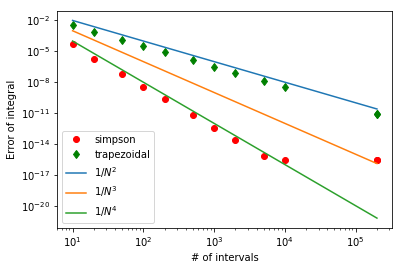

In [8]:
print("{:5}|{:20}|{:24}|{:24}|{:24}".format("N", "approx_s", "error_s", "approx_t", "error_t"))

Nset = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 200000])
for N in Nset:
    
    approx_s = integrate_simpson(expr_np, (l,r), N)
    error_s = abs((approx_s - integral_exact)/integral_exact)
    
    approx_t = integrate_trapezoidal(expr_np, (l,r), N)
    error_t = abs((approx_t - integral_exact)/integral_exact)
    
    print("{:5}|{:20}|{:24}|{:24}|{:24}".format(N, approx_s, error_s, approx_t, error_t))
    plt.loglog(N, error_s, "ro")
    plt.loglog(N, error_t, "gd")

plt.plot(N, error_s, "ro", label="simpson")
plt.plot(N, error_t, "gd", label="trapezoidal")

plt.plot(Nset, Nset**(-2.0),label=r"$1/N^2$")
plt.plot(Nset, Nset**(-3.0),label=r"$1/N^3$")
plt.plot(Nset, Nset**(-4.0),label=r"$1/N^4$")

plt.xlabel("# of intervals")
plt.ylabel("Error of integral")
plt.legend(loc="lower left")

Note that this plot is logarithmic on both axis.

## Order of Convergence

In the last plot we have seen that in both, the Simpson and method and the trapezoidal integration the error becomes smaller and smaller as we increase the number $N$ of intervals. However, in the Simpson method, the error is reduced much quicker. Because the reduction of the error seems to follow a straight line in the double logarithmic plot, we may speculate that the error $\epsilon$ follows a power law and behaves like 
\begin{equation}
\epsilon = C  N^{-d}
\end{equation}
Taking the logarithm on both sides, we obtain
\begin{equation}
\log\epsilon = C  -d \log N
\end{equation}
and therefore this yields a curve with slope $-d$ if we plot $\log\epsilon$ versus $\log N$. The number $d$ is called the *order* of convergence of the numerical algorithm in question. In the last plot, we have also plotted the curves $1/N^2$, $1/N^3$ and $1/N^4$.  We see that up to a constant vertical shift (due to the arbitrary constant C in the equation above), the error of the trapezoidal rule has the same slope as $1/N^2$ in this double logarithmic plot. 

We therefore speculate that the trapezoidal rule has order of convergence of 2. In contrast, the Simpson algorithm follows the slope of $1/N^{4}$ and has therefore order of convergence 4. So far this conclusion is only based on one example function, but it can be mathematically proved that this order of convergence holds true for a large class of sufficiently smooth functions.  The following *big O* notation  is often used to express the order of convergence of the Simpson method:

\begin{equation}
 \int_r^l f(x)dx = \frac{h}{3}\left[ f_0 + 4 \left(\sum_{k=1}^{N/2} f_{2k-1}\right) + 2 \left(\sum_{k=1}^{N/2-1} f_{2k}\right) +f_N \right] + \mathcal{O}\left(\frac{1}{N^4}\right)
\end{equation}





## Differential equations

In many areas of science the main task is to solve *differential equations*, i.e. equations which contain a function and its derivative. In mechanics you learn for example that the position $\mathbf{x}\in\mathbb{R}^3$ of a particle of mass $m$ follows the differential equation 
\begin{equation}
m\ddot{\mathbf{x}} = \mathbf{F}(\mathbf{x},\dot{\mathbf{x}}).
\end{equation}
Here $\mathbf{F}$ is a force, which itself can depend on the position and the velocity vector of the particle. 

One of the simplest differential equations is the damped harmonic oscillator
\begin{equation}
m\ddot{x} + c \dot{x} + kx = 0
\end{equation}
where $m$ is the mass of a particle, $k$ is the strength of a linear force, which pulls the particle back to the origin and $c$ is a damping coefficent.

If we want to solve this equation on a computer, we first rewrite it in a form which is more suitable.  We introduce a velocity variable $v=\dot{x}$ and write 
\begin{align}
\dot{x}(t) &= v(t)\\
\dot{v}(t) &= -\frac{k}{m}x(t) -\frac{c}{m}v(t) 
\end{align}

Let us now assume that we are given some initial position and velocity $x(0) = x_0$ and $v(0)=v_0$. Given this information, and the above equations, would we then be able to calculate the trajectory for $x(t)$ (and $v(t)$) for times $t>0$?

As a first approach we can try to approximate the time derivative on the left hand side as follows:
\begin{equation}
\dot{x}(t)\approx \frac{x(t+h)-x(t)}{h}
\end{equation}
We know that this approximation is exact in the limit of $h\to 0$ and we might hope that it is not too bad if we choose $h$ small enough.  We approximate $\dot{v}$ in a similar fashion and therefore obtain:
\begin{align}
x(t+h)  &\approx x(t) + h\left[ v(t) \right]\\
v(t+h)  &\approx v(t) + h\left[-\frac{k}{m}x(t) -\frac{c}{m}v(t) \right]
\end{align}

This means that we obtain approximations $(x(t+h),v(t+h))$ if we are given $(x(t),v(t))$.  We expect this approximations to become better, the smaller the timestep $h$ is.  Let us try to realize this in python:

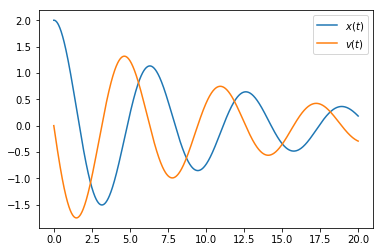

Text(0,0.5,'v')

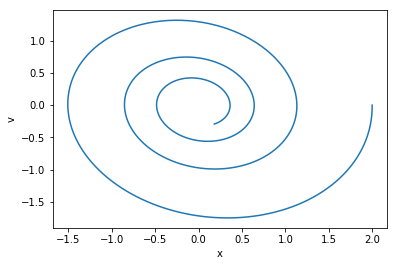

In [3]:
k, c, m = 1.0, 0.2, 1.0 # specify the parameters

x0, v0 = 2.0, 0 # specify the parameters

Tmax = 20.0 # final time
N = 1000 # number of timesteps

h = Tmax / N # length of timestep

T = np.linspace(0,Tmax,N+1)
x = np.zeros(N+1)
v = np.zeros(N+1)

x[0], v[0] = x0, v0 # put initial conditions at position zero

for i in range(N):
    x[i+1] = x[i] + h* v[i]
    v[i+1] = v[i] + h* (-k/m * x[i] - c/m * v[i])
    
plt.plot(T,x,label=r"$x(t)$")
plt.plot(T,v,label=r"$v(t)$")
plt.legend()
plt.show()
plt.plot(x,v)
plt.xlabel("x")
plt.ylabel("v")

This method of solving a system of (ordinary) differential equations is called *forward Euler* scheme and is the simplest possible method.  Unfortunately it is not very accurate. For example there is a slightly embarassing result for zero damping (c=0). Unless we go to very high $N$, we are actually spiralling out, while mechanical energy conservation suggests that we return to the original position after one rotation. The reason for this is due to the way, we have approximated the derivative. Before we set out to improve this method let us first better separate the *physics* from the *numerics* in our description.  

Let us define a function `oscillator(xv)` which contains all physical aspects of our problem:

    def oscillator(xv, k = 1.0, c=0.2, m = 1.0):            
        x = xv[0]
        v = xv[1]
        xdot = v
        vdot = -k/m * x - c/m * v
    
        return np.array([xdot,vdot])

This function essentially defines the right hand side of the original differential equation. It expects an array $(x,v)$ and will return an array $(\dot{x},\dot{v})$. It also allows us to modify the default parameters of the harmonic oscillator. 


Using this definition we can now define a function `forward_euler(f,xv0,T)` which takes as arguments another function `f` (for example `oscillator`), an initial position `xvinit` and a (float) number `Tmax` as well as an integer number `N`, which specify the maximal time and the number of steps we want to integrate.  This function could look like this:

    def forward_euler(f, xvinit, Tmax, N):
        T = np.linspace(0,Tmax,N+1)
        xv = np.zeros( (len(T), len(xvinit)) )
        xv[0] = xvinit
        h = Tmax / N
        for i in range(N):
            xv[i+1] = xv[i] + h* f(xv[i])
        return T, xv

Note, that in the function `forward_euler` there is now no mentioning of the physics of the harmonic oscillator any more.  Even the dimensionality of the system is not used inside forward_euler(). In mathematical terms the function `forward_euler()` defines the sequence

\begin{equation}
    \mathbf{x}_{i+1} = \mathbf{x}_i + h \mathbf{f}(\mathbf{x}_i) \quad \text{for $i=0,\ldots,N-1$} 
\end{equation}

This means that after we have written this function once, we may apply it to many different problems also outside physics, where we originally started. This is a typical example of code reuse.  Also note that this is only possible because we have defined a generic *interface* between numerics and physics. 


Text(0,0.5,'v')

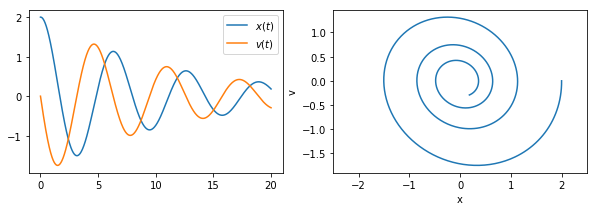

In [4]:
def oscillator(xv, k = 1.0, c=0.2, m = 1.0):        
    x = xv[0]
    v = xv[1]
    
    xdot = v
    vdot = -k/m * x - c/m * v
    
    return np.array([xdot,vdot])
    
def forward_euler(f, xvinit, Tmax, N):
    T = np.linspace(0,Tmax,N+1)
    xv = np.zeros( (len(T), len(xvinit)) )
    xv[0] = xvinit
    h = Tmax / N
    for i in range(N):
        xv[i+1] = xv[i] + h* f(xv[i])
    return T, xv

x0, v0 = 2.0, 0 # specify the initial conditions
Tmax = 20.0 # final time
N = 1000 # number of timesteps

xv0 = np.array([x0, v0])

T, xv = forward_euler(oscillator, xv0, Tmax, N)

x = xv[:,0]
v = xv[:,1]

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(T,x,label=r"$x(t)$")
plt.plot(T,v,label=r"$v(t)$")
plt.legend()
plt.subplot(1,2,2)

plt.plot(x,v)
plt.xlim((-2.5,2.5))
plt.xlabel("x")
plt.ylabel("v")


Okay, this seems to work. Now we might like to change the oscillator, so that it has zero damping, for example, as we have seen that this might be a problematic case.  We know that in order to call `forward_euler()` we need to provide a function which implements the physics of the oscillator without damping. 

Instead of copying and pasting the above code and setting `c=0`, we can define a function `oscillator_no_damping` through 

    def oscillator_no_damping(xv):
        return oscillator(xv,c=0)

and then we can call 

    T, xv = forward_euler(oscillator_no_damping, xv0, Tmax, N)
    
The disadvantage here is that this explicit definition of functions can become quite cumbersome, as we need to come up with nice names for them and the code becomes cluttered. In Python there is however a nice shortcut for this type of definition. Instead of the above explicit definition of `oscillator_no_damping` we can also write:

    oscillator_no_damping = lambda x: oscillator(x, c=0)
    
This is a *lambda function* and can be read almost as if it was in the normal mathematical notation 
\begin{equation}
\operatorname{oscillator\_no\_damping}: x\mapsto \operatorname{oscillator(x,c=0)}
\end{equation}

Therefore the `lambda` keyword gives us a convenient way to produce a function on the fly.  In fact, it is often not even necessary to provide a name for this function. In the example above, we only require this function to be used when we call `forward_euler()`.  We can therefore simply write 

    T, xv = forward_euler(lambda x: oscillator(x, c=0), xv0, Tmax, N)
    
This means that at the point where the function is expected by `forward_euler()` we construct it based on our previously defined `oscillator()` function.  Let us check that this works as advertised:

    

In [18]:
@interact(c=(0.0, 5.0,0.01000),N=(10,1000,10))
def plot_oscillator(c,N=100):
    Tmax = 20.0 # final time
    
    xv0 = np.array([2.0, 0]) # specify the initial conditions

    T, xv = forward_euler(lambda x: oscillator(x,c=c), xv0, Tmax, N)

    x = xv[:,0]
    v = xv[:,1]

    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    plt.plot(T,x,label=r"$x(t)$")
    plt.plot(T,v,label=r"$v(t)$")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x,v)
    plt.xlim((-3,3))
    plt.ylim((-3,3))
    plt.plot(x[0],v[0],"go")
    plt.plot(x[-1],v[-1],"ro")
    plt.xlabel("x")
    plt.ylabel("v")
    plt.show()



### Runge-Kutta algorithm

Consider again a dynamical system of the form 
\begin{align}
\frac{d}{dt}\mathbf{x} &= \mathbf{f}(\mathbf{x})\\
\mathbf{x}(0) &= \mathbf{x}_0
\end{align}

As a first approximation to the solution of this equation we have introduced the *forward Euler* scheme
\begin{equation}
    \mathbf{x}_{i+1} = \mathbf{x}_i + h \mathbf{f}(\mathbf{x}_i) \quad \text{for $i=0,\ldots,N-1$} 
\end{equation}

Similar to the trapezoidal rule for integrating functions, it turns out that the simple *forward Euler* rule is often very inefficient to solve dynamical equations.  Already more than 100 years (long before computers were in common use) it was shown that the following method is vastly more efficient:

\begin{equation}
\mathbf{x}_{i+1} = \mathbf{x}_i + \frac{h}{6}\left(\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4 \right)
\end{equation}
\begin{align}
\mathbf{k}_1 &= \mathbf{f}(\mathbf{x}_i),\\
\mathbf{k}_2 &= \mathbf{f}(\mathbf{x}_i + \tfrac{h}{2} \mathbf{k}_1),\\
\mathbf{k}_3 &= \mathbf{f}(\mathbf{x}_i + \tfrac{h}{2} \mathbf{k}_2),\\
\mathbf{k}_4 &= \mathbf{f}(\mathbf{x}_i + h\mathbf{k}_3).
\end{align}

A strict derivation of this method is beyond the scope of this course, but it can be shown that the order of convergence of this method is 4. Because of the way we have separated physics and numerics before, we can now simply write a new function of integration in the following way:

    def rk4(f, xvinit, Tmax, N):
        T = np.linspace(0,Tmax,N+1)
        xv = np.zeros( (len(T), len(xvinit)) )
        xv[0] = xvinit
        h = Tmax / N
        for i in range(N):
            k1 = f(xv[i])
            k2 = f(xv[i] + h/2.0*k1)
            k3 = f(xv[i] + h/2.0*k2)
            k4 = f(xv[i] + h*k3)
            xv[i+1] = xv[i] + h/6.0 *( k1 + 2*k2 + 2*k3 + k4)
        return T, xv
        
If you compare this with the previous implementation of the forward Euler scheme, you notice that the *interface* of `rk4` did not change at all.  This means that we will be able to use `rk4` as a drop-in replacement for `forward_euler`. (Actually all differences between )



In [19]:
%matplotlib inline

def rk4(f, xvinit, Tmax, N):
    T = np.linspace(0, Tmax, N+1)
    xv = np.zeros( (len(T), len(xvinit)) )
    xv[0] = xvinit
    h = Tmax / N
    for i in range(N):
        k1 = f(xv[i])
        k2 = f(xv[i] + h/2.0*k1)
        k3 = f(xv[i] + h/2.0*k2)
        k4 = f(xv[i] + h*k3)
        xv[i+1] = xv[i] + h/6.0 *( k1 + 2*k2 + 2*k3 + k4)
    return T, xv

@interact(c=(0.0, 5.0,0.01000),N=(1,1000,5))
def plot_oscillator(c, N=100):
    
    Tmax = 20.0 # final time
    

    xv0 = np.array([2.0, 0]) # specify the initial conditions

    T, xv = rk4(lambda x: oscillator(x,c=c), xv0, Tmax, N)

    x = xv[:,0]
    v = xv[:,1]

    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    plt.plot(T,x,label=r"$x(t)$")
    plt.plot(T,v,label=r"$v(t)$")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x,v)
    plt.plot(x[0],v[0],"go")
    plt.plot(x[-1],v[-1],"ro")


    plt.xlim((-2.5,2.5))
    plt.ylim((-2.5,2.5))
    plt.xlabel("x")
    plt.ylabel("v")
    plt.show()

